Does age have a correlation to performance for top performers in the league?
Introduction:
In this notebook, I will be analysing the performances of players and if age is a performance factor during the regular
season, including efficiency and breaking them down between their positions.

In [2]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Loading:
The first step will be to load in the csv file correctly. As the file is not formatted properly the following lines
will need to be used to prevent errors of it loading in as it is set in the file with its commas

encoding = "utf-8"
delimiter = ";"

In [5]:
#Loading in NBA csv
players_2022 = pd.read_csv("2021-2022 NBA Player Stats.csv", delimiter= ";", encoding= "utf-8", index_col=0)
players_2022

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rank,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


Data Cleaning:
Check what columns are in the dataset if there are any null values.

In [16]:
players_2022.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
null_values = players_2022.isnull().sum()
null_values[:]

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
PER       0
dtype: int64

No null values in the dataset which is a good sign. No need for removal.

Extra Information:

There is an important field missing in the for the Players, which is there Player Efficiency Rating (PER).
The calculation for this is:

PER = (PTS + REB + AST + STL + BLK - Missed FG(FGA-FG) - Missed FT(FTA-FT) - TOV) / G
(Since all stats are already calculated per game, there is no need to divide the PER by G)

In [5]:
# Calculating PER
player_eff_rating = (players_2022.PTS + players_2022.TRB + players_2022.AST + players_2022.STL + players_2022.BLK - (players_2022.FGA - players_2022.FG) - (players_2022.FTA - players_2022.FT) - players_2022.TOV)
# Insert the Column into the table
players_2022.insert(29, "PER", player_eff_rating)
players_2022.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
Rank,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,11.2
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17.0
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,25.0
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,4.7
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,15.1
6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,8.5
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,0.375,...,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,10.0
6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,0.333,...,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5,4.0
7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,0.448,...,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,11.5


Data Splitting:
Before analysis of the players, I am going to split them by position to find the top players in each position.
I will be splitting the players into their respective positions of PG, SG, SF, PF and C.

In [7]:
point_2022 = players_2022[players_2022.Pos == "PG"]
shooting_2022 = players_2022[players_2022.Pos == "SG"]
smallf_2022 = players_2022[players_2022.Pos == "SF"]
powerf_2022 = players_2022[players_2022.Pos == "PF"]
center_2022 = players_2022[players_2022.Pos == "C"]

point_2022

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
Rank,,,,,,,,,,,,,,,,,,,,,
9,Jose Alvarado,PG,23,NOP,54,1,15.4,2.4,5.4,0.446,...,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1,8.2
15,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,14.0,0.391,...,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3,16.7
17,Ryan Arcidiacono,PG,27,NYK,10,0,7.6,0.6,1.2,0.500,...,0.0,0.8,0.8,0.4,0.1,0.0,0.3,0.5,1.6,2.0
19,D.J. Augustin,PG,34,TOT,55,2,16.1,1.7,4.0,0.423,...,0.2,1.0,1.2,1.9,0.3,0.0,1.0,0.7,5.3,5.3
19,D.J. Augustin,PG,34,HOU,34,2,15.0,1.6,4.0,0.404,...,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Brandon Williams,PG,22,POR,24,16,26.7,4.4,11.8,0.372,...,0.8,2.3,3.1,3.9,1.0,0.4,2.4,2.2,12.9,10.3
587,Lou Williams,PG,35,ATL,56,0,14.3,2.2,5.7,0.391,...,0.3,1.3,1.6,1.9,0.5,0.1,0.8,0.9,6.3,5.9
594,Cassius Winston,PG,23,WAS,7,0,5.6,0.6,1.6,0.364,...,0.0,0.1,0.1,1.0,0.0,0.0,0.4,1.3,2.0,1.7


Data Visualisation:
I can now make some visual representations of the data and also visually realise some trends in data
or just find the top performers in the league

Swarm Plot on the Player Efficiency Rating and Points Per Game by positions in the NBA for a non overlapping scatter plot:

Text(154.59722222222223, 0.5, 'Points Per Game')

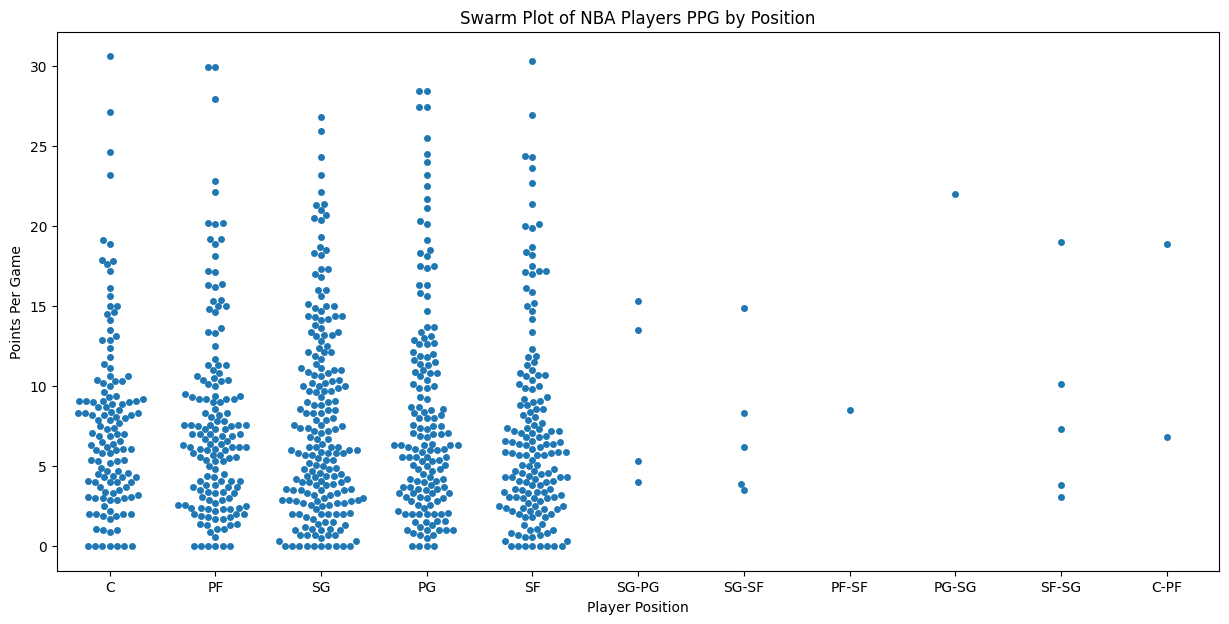

In [48]:
# Swarm Plot for Points Per Game
plt.figure(figsize=(15, 7))
sns.swarmplot(x= players_2022["Pos"], y= players_2022["PTS"])
plt.title("Swarm Plot of NBA Players PPG by Position")
plt.xlabel("Player Position")
plt.ylabel("Points Per Game")

Text(154.59722222222223, 0.5, 'Player Efficiency Rating')

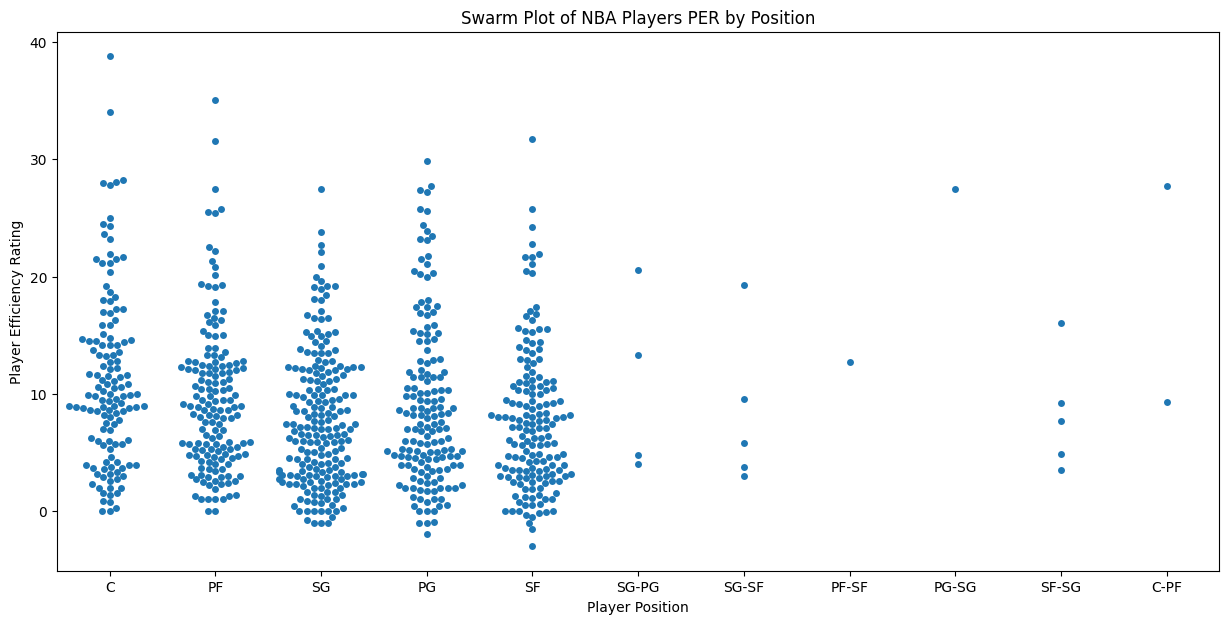

In [25]:
# Swarm Plot on the PER
plt.figure(figsize=(15, 7))
sns.swarmplot(x= players_2022["Pos"], y= players_2022["PER"])
plt.title("Swarm Plot of NBA Players PER by Position")
plt.xlabel("Player Position")
plt.ylabel("Player Efficiency Rating")

From these two graphs we see that only a select few players are scoring more than 25 PPG in that season. However, more players
in the Center position have a bigger spread in PER's than other positions, but do not average a high amount of points.

Description of the Dataset:
From this we can gather that the youngest player in the NBA is 19, while the oldest is 41. The max PPG in the league is 30.6
and the max PER is 38.8. At the 75th percentile, the PPG and PER is 10.6 and 12.4 respectively. The average for both is 7.8
and 9.

In [49]:
players_2022.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,0.276538,...,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438,9.022537
std,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,0.157579,...,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077,6.671111
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,0.224000,...,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000,3.900000
50%,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,0.321500,...,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000,8.100000
75%,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,0.370250,...,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000,12.400000
max,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,...,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000,38.800000


Are younger players performing better than older players?
To clean this up more, I need to get the top players of the league to get a bigger spread in the data and get rid of
players who are scoring a bit above the 75th Percentile of the score.

In [50]:
top_players = players_2022[(players_2022.PTS > 15)]

top_players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
Rank,,,,,,,,,,,,,,,,,,,,,
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,25.0
8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,24.5
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,...,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,35.1
15,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,14.0,0.391,...,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3,16.7
16,OG Anunoby,SF,24,TOR,48,48,36.0,6.4,14.5,0.443,...,1.5,4.0,5.5,2.6,1.5,0.5,1.7,2.7,17.1,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Franz Wagner,SF,20,ORL,79,79,30.7,5.8,12.3,0.468,...,1.1,3.4,4.5,2.9,0.9,0.4,1.5,2.1,15.2,15.5
576,Russell Westbrook,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,...,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5,20.0
582,Andrew Wiggins,SF,26,GSW,73,73,31.9,6.5,14.0,0.466,...,1.2,3.3,4.5,2.2,1.0,0.7,1.5,2.2,17.2,15.4


Due to players playing in multiple teams during the season due to being traded, they are duplicating where we only need one of
them on this occasion, so this needs to be cleaned up and keep the total amount that is there

In [52]:
top_players.drop_duplicates(subset= ["Player"], keep= "first")

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
Rank,,,,,,,,,,,,,,,,,,,,,
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,25.0
8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,24.5
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,...,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,35.1
15,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,14.0,0.391,...,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3,16.7
16,OG Anunoby,SF,24,TOR,48,48,36.0,6.4,14.5,0.443,...,1.5,4.0,5.5,2.6,1.5,0.5,1.7,2.7,17.1,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Franz Wagner,SF,20,ORL,79,79,30.7,5.8,12.3,0.468,...,1.1,3.4,4.5,2.9,0.9,0.4,1.5,2.1,15.2,15.5
576,Russell Westbrook,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,...,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5,20.0
582,Andrew Wiggins,SF,26,GSW,73,73,31.9,6.5,14.0,0.466,...,1.2,3.3,4.5,2.2,1.0,0.7,1.5,2.2,17.2,15.4


Now with these top players in the league, we can now see if the younger players are outperforming the older players
Linear Regression Plot:

Text(0, 0.5, 'Points Per Game')

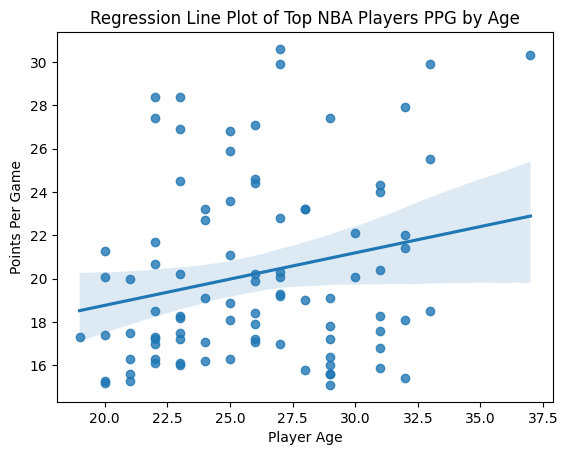

In [84]:
top_nba = top_players.drop_duplicates(subset= ["Player"], keep= "first")

sns.regplot(data=top_nba, x= "Age", y="PTS")
plt.title("Regression Line Plot of Top NBA Players PPG by Age")
plt.xlabel("Player Age")
plt.ylabel("Points Per Game")

Text(0, 0.5, 'Player Efficiency Rating (PER)')

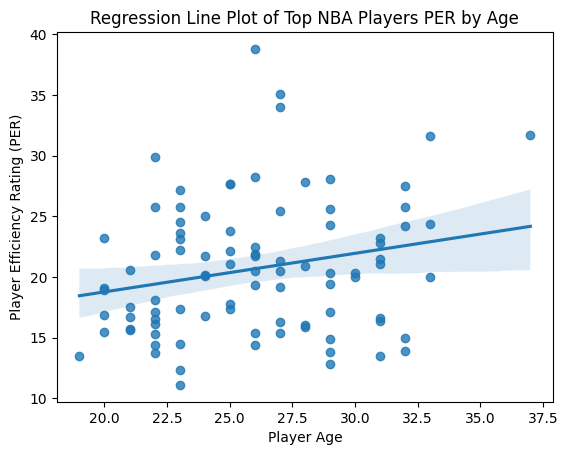

In [85]:
sns.regplot(data=top_nba, x="Age", y="PER")
plt.title("Regression Line Plot of Top NBA Players PER by Age")
plt.xlabel("Player Age")
plt.ylabel("Player Efficiency Rating (PER)")

In both graphs there is little correlation between Age and their performance in scoring and efficiency rating.
There are only 6 players under the age of 25 that are averaging more than 25 PPG. They are:

In [77]:
young_nba = top_nba[(top_nba.Age <= 25) & (top_nba.PTS > 25)].sort_values("PTS", ascending=False)

young_nba.loc[:, ["Player", "Tm", "PTS", "PER"]]

,Player,Tm,PTS,PER
Rank,,,,
141,Luka Don?i?,DAL,28.4,29.9
602,Trae Young,ATL,28.4,27.2
390,Ja Morant,MEM,27.4,25.8
526,Jayson Tatum,BOS,26.9,25.8
59,Devin Booker,PHO,26.8,23.8
383,Donovan Mitchell,UTA,25.9,22.1


On the flip side of this, only 8 players older than 25 are averaging more than 25 points per game.

In [83]:
older_nba = top_nba[(top_nba.Age > 25) & (top_nba.PTS > 25)].sort_values("PTS", ascending=False)
older_nba.loc[:, ["Player", "Tm", "PTS", "PER"]]

,Player,Tm,PTS,PER
Rank,,,,
162,Joel Embiid,PHI,30.6,34.0
274,LeBron James,LAL,30.3,31.7
12,Giannis Antetokounmpo,MIL,29.9,35.1
154,Kevin Durant,BRK,29.9,31.6
134,DeMar DeRozan,CHI,27.9,25.8
266,Kyrie Irving,BRK,27.4,25.6
290,Nikola Joki?,DEN,27.1,38.8
126,Stephen Curry,GSW,25.5,24.4


Conclusion:
From the data seen here, while the majority of the top older players have a marginally better PER than the top younger players,
age does not seem to affect the scoring ability of younger players in the NBA. There is little positive correlation between
PER and PPG to Age as seen in the tables and using the corr() method to get the r in the Top NBA players table. As age does show 
that more experience can sharpen PER, it mostly all comes down to factors of talent, skill, IQ and other qualities over Age.

In [95]:
stats_correlation = top_nba.loc[:, ["PTS", "PER", "Age"]]

stats_correlation.corr()

,PTS,PER,Age
PTS,1.000000,0.755580,0.226485
PER,0.755580,1.000000,0.227093
Age,0.226485,0.227093,1.000000
